# Principal Component Analysis(PCA) :
with IRIS Dataset

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
print(iris.keys())
print(iris.feature_names)
X = iris.data

#print(X)
print(X[0:5,])
y = iris.target
#print(y)
print(y[0:5,])
name = iris.target_names
print(name)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [73]:
#In general a good idea is to scale the data
from scipy import stats
#X = stats.zscore(X)
#print(X)
print(X[0:5,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [74]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#print(X)
print(X[0:5,])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


# PCA

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
x = pca.fit_transform(X)
#print(x)

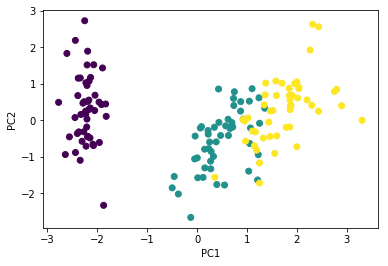

In [76]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split - old
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
#print(X_train)
#print(X_test)
#print(y_train)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]


# LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred = classifier.predict(X_test) 

In [60]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.8333333333333334


In [ ]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

# SVC

In [61]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train) 

y_pred = svm.predict(X_test) 


In [62]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Confusion Matrix : 
 [[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]
Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.93
